## World Happiness Report (2015 - 2021)

The World Happiness Report is an annual report released by the UN using data collected from the Gallup World Poll. The Report is a survey of the overall state of global happiness. Respondents are asked to think of how the best possible life for themselves from 1 (worst) to 10 (absolute best) and to rank their current life circumstances as a number between the rankings of 1 to 10.

The current six columns preceding Happiness Score estimate the extent of these factors contribute to life evaluations:
* economic production 
* social support 
* life expectancy
* freedom
* absence of corruption
* generosity  

These factors do not directly contribute to the Happiness Score, however they can help to explain differences between countries and why some rank higher than others.
The final factor (Dystopia), is a hypothetical country that contains the the least satisfied individuals. It is essentially the benchmark to which every country can be compared to favorably.


* What are the trends of World Happiness from 2015 to 2021?
* What factors contribute most to world happiness?
* Which Regions are the "most happy" (Highest Score) ?
* Using Income Group classifications, which country / income group has the highest Happiness Scores?
* What countries have the highest and lowest happiness scores?
* Which countries have a happiness score equal to or higher than United States?

We'll be using an additional dataset that outlines development indicators of all countries. From this dataset we are interested in the income group that a particular country has been assigned by the World Bank.

The World Bank assigns each country one of four income groups:
* Low income
* Lower-middle income
* Upper-middle income
* High income

The World Bank uses Gross national income per capita as the criteria for assignment
Sum of value added by all resident producers plus any product taxes.

With these income classifications we can answer questions such as: of which income group has the highest/lowest score.

*https://www.kaggle.com/unsdsn/world-happiness*


### Method
* Load datasets 2015 to 2021
* Clean dataframes, including standardizing any columns if needed
* Concatenate all seven dataframes into one large dataframe for analysis
* Correct any remaining inconsistencies/errors
* Perform analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use("fivethirtyeight")
%matplotlib inline
import glob

In [2]:
whr_2015 = pd.read_csv("2015.csv")
whr_2016 = pd.read_csv("2016.csv")
whr_2017 = pd.read_csv("2017.csv")
whr_2018 = pd.read_csv("2018.csv")
whr_2019 = pd.read_csv("2019.csv")
whr_2020 = pd.read_csv("2020.csv")
whr_2021 = pd.read_csv("2021.csv")

We have several datasets from years 2015 to 2021. For simplicity let's just print out the first year, 2015 and inspect it.

In [3]:
whr_2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
whr_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

We could potentially find answers to some of our questions by aggregation based on individual countries, however that would mean working with nearly 200 unique values. There are too many data points attempting to plot all 158 countries would be impractical.

We noticed another column called region that would be a more suitable solution to interpreting the data.

In [5]:
whr_2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [6]:
whr_2015["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [7]:
whr_2015[whr_2015["Country"] == "Trinidad and Tobago"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.0114,0.31844,2.26882


By utilizing the .unique() method we can verify the Region column is more appropriate column to group by for our purposes. We went from 158 countries down to a more manageable 10 regions.

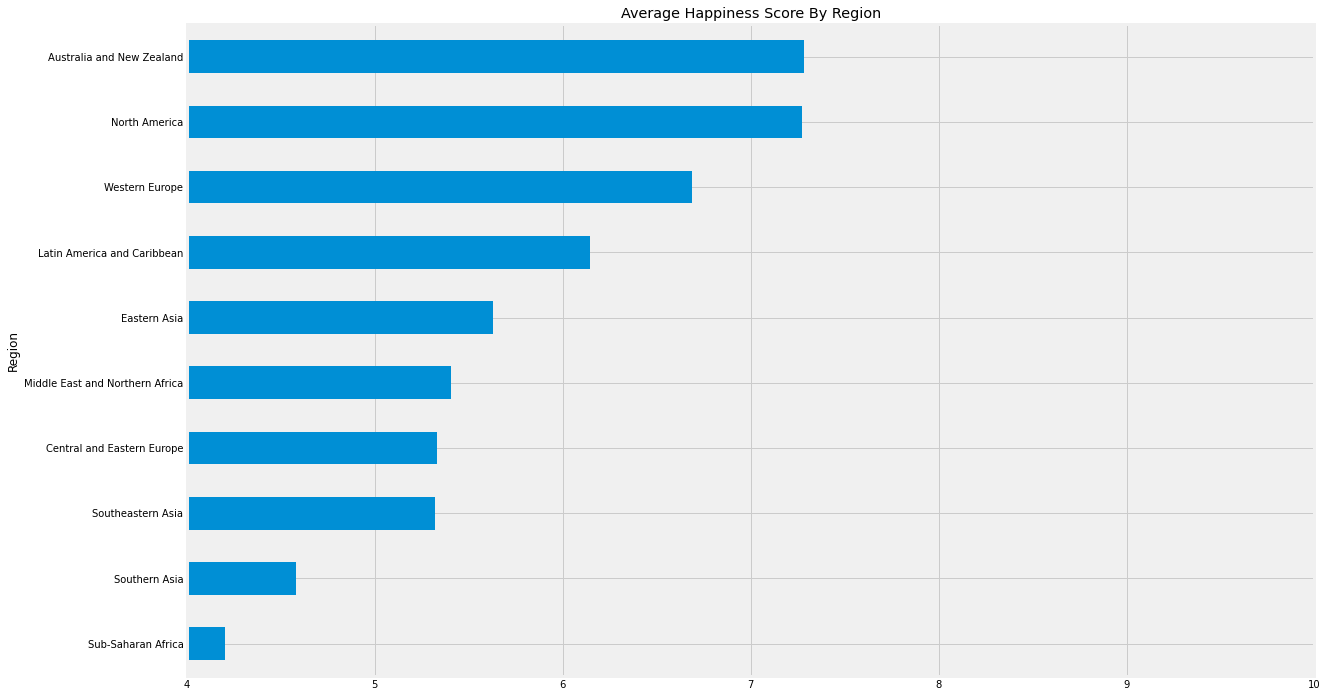

In [8]:
# Assign groupby object
region = whr_2015.groupby("Region")

# Caluclate Mean of Happiness Score
region_mean = region["Happiness Score"].mean().sort_values()
# Plot Results
region_mean.plot(kind="barh",figsize=(18,12), title = "Average Happiness Score By Region", xlim=(4,10));

At first glance we may observe that Western Europe, North America, and Australia/New Zealand have the highest mean Happiness Score, while Sub-Saharan Africa and Southern Asia have the lowest scores.

In [9]:
region_stats = whr_2015.pivot_table(["Happiness Score", "Family"], "Region",aggfunc=[np.min,np.max,np.mean], margins=True)
region_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

In the bar graph above we noted that North America, Western Europe and Australia/New Zealand had the highest mean Happiness Score. With the except of these three regions: North America and Western Europe's minimum and maximum Happiness Scores do not deviate nearly at all from their Mean Happiness Score, which could suggest that the inhabitants of these regions generally have a very positive outlook on their life circumstances compared to other regions.

Regions with lower Mean Happiness Scores tend to have a much larger difference between their minimum and maximum scores.

For example: (Middle-East/Northern Africa's minimum score is 3.0, and it's maximum score is 7.2 with a Mean of 5.4)

This may suggest that their is a wildly varying degree of outlook on overall happiness in one's country.

### Years 2015 to 2017

Before merging all seven datasets into one large data frame we're going to need to create a new column "Year" to be able to differentiate between our the different years for proper analysis.

In [10]:
# Preview columns of first three years
print(whr_2015.columns)
print(whr_2016.columns)
print(whr_2017.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


Most of the columns are shared throughout the first three years, however year 2017 is quite messy and its missing a critical column "Region".
We should standardize all the column names and add a new column to 2017.

In order to transfer the regions into that dataframe without doing it manually, the most practical method will be to map the Region column from 2015 to the newly created Region column in 2017. Below we will write the code to do so.

In [11]:
# Region mapping

# Read in year 2015 assigned to a new variable
# Use Country as index
# Use to_dict method 
region_mapper = pd.read_csv("2015.csv", index_col = "Country").to_dict() 

# Re-assign to only include region
region_mapper = region_mapper["Region"]

# Map 2015 region to 2017 Country
whr_2017["Region"] = whr_2017["Country"].map(region_mapper)

In [12]:
whr_2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa


In [13]:
# Add new column with appropriate Year
whr_2015["Year"] = 2015
whr_2016["Year"] = 2016
whr_2017["Year"] = 2017


In [14]:
# New column name mapping

# 2015 and 2016
cols_15_16 = {
        "Health (Life Expectancy)": "Health",
        "Economy (GDP per Capita)": "Economy",
        "Trust (Government Corruption)": "Trust Government Corruption"
        } 

# 2017
cols_17 = { 
            "Happiness.Rank":"Happiness Rank",
            "Happiness.Score":"Happiness Score",
            "Whisker.high": "Whisker high",
            "Whisker.low": "Whisker low",
            "Economy..GDP.per.Capita.": "Economy",
            "Health..Life.Expectancy.": "Health",
            "Trust..Government.Corruption.": "Trust Government Corruption",
            "Dystopia.Residual": "Dystopia Residual"
            } 

# Rename columns in 2015 and 2016
whr_2015 = whr_2015.rename(columns=cols_15_16)
whr_2016 = whr_2016.rename(columns=cols_15_16)
whr_2017 = whr_2017.rename(columns=cols_17)

Let's start with concatenating just the first three years. It will be easier to identify and fix any incorrect or missing values with fewer rows than if we combined all seven dataframes at once.

## Concatenate DataFrames


In [15]:
# Concatenate First Three Years, ignoring index
happiness_report_1 = pd.concat([whr_2015, whr_2016, whr_2017],ignore_index=True)

In [16]:
# Verifies columns are correct
happiness_report_1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust Government Corruption', 'Generosity', 'Dystopia Residual',
       'Year', 'Lower Confidence Interval', 'Upper Confidence Interval',
       'Whisker high', 'Whisker low'],
      dtype='object')

In [17]:
happiness_report_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      470 non-null    object 
 1   Region                       464 non-null    object 
 2   Happiness Rank               470 non-null    int64  
 3   Happiness Score              470 non-null    float64
 4   Standard Error               158 non-null    float64
 5   Economy                      470 non-null    float64
 6   Family                       470 non-null    float64
 7   Health                       470 non-null    float64
 8   Freedom                      470 non-null    float64
 9   Trust Government Corruption  470 non-null    float64
 10  Generosity                   470 non-null    float64
 11  Dystopia Residual            470 non-null    float64
 12  Year                         470 non-null    int64  
 13  Lower Confidence Int

Eventhough we successfully mapped the year 2015 regions to 2017, we still have a few missing values in the region column.
Before we make any corrections, let's verify the unique values in the Country and Region columns.

In [18]:
happiness_report_1["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [19]:
happiness_report_1["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', nan], dtype=object)

Everything looks alright for country values, there does not appear to be any duplicate names as a result of alternate formating/spelling. 470 unique countries seems about right if we divide by the three current dataframes that were concatenated.

Nothing appears wrong with the regions except for the NaN value which we'll fix below.

In [20]:
# Filters only for rows with NaNs in the Region Column
missing = happiness_report_1["Region"].isnull()
happiness_report_1[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
347,Taiwan Province of China,NaN,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN,NaN,6.494596,6.349404
364,Belize,NaN,50,5.956,NaN,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017,NaN,NaN,6.197242,5.714757
385,"Hong Kong S.A.R., China",NaN,71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN,NaN,5.549594,5.394406
407,Somalia,NaN,93,5.151,NaN,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,3.117485,2017,NaN,NaN,5.242484,5.059516
425,Namibia,NaN,111,4.574,NaN,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,1.481890,2017,NaN,NaN,4.770355,4.377645
461,South Sudan,NaN,147,3.591,NaN,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,1.879567,2017,NaN,NaN,3.725539,3.456462


Since we only have 6 missing values in the Region Column we can simply rename the values to the appropriate region name according to the particular country.

In [21]:
# Set new value to appropriate region name
# Use iloc to select list of countries, and select Region: index = 1
happiness_report_1.iloc[[347, 364, 385, 407, 425, 461],1] = [
                                                             "Eastern Asia", 
                                                             "Latin America and Caribbean",
                                                             "Eastern Asia", 
                                                             "Sub-Saharan Africa", 
                                                             "Sub-Saharan Africa", 
                                                             "Sub-Saharan Africa" 
                                                             ]

In [22]:
# Verify changes to Region Column made above
happiness_report_1["Region"].value_counts(dropna=False)

Sub-Saharan Africa                 117
Central and Eastern Europe          87
Latin America and Caribbean         68
Western Europe                      63
Middle East and Northern Africa     58
Southeastern Asia                   26
Southern Asia                       21
Eastern Asia                        18
North America                        6
Australia and New Zealand            6
Name: Region, dtype: int64

## Years 2018 to 2019

In [23]:
whr_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [24]:
whr_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
whr_2018["Year"] = 2018
whr_2019["Year"] = 2019

We have the same problem as we did with the 2017 dataset, because neither 2018 nor 2019 have the region column.
We're going to have to implement the mapping method like we did for year 2017.

In [26]:
# 2018 and 2019
new_columns = {
               "Country or region": "Country",
               "Score": "Happiness Score",
               "GDP per capita": "Economy",
               "Social support": "Family",
               "Healthy life expectancy": "Health",
               "Freedom to make life choices": "Freedom",
               "Perceptions of corruption": "Trust Government Corruption",
               "Overall rank": "Happiness Rank"
              }



In [27]:
# Rename columns in 2018 and 2019
whr_2018 = whr_2018.rename(columns=new_columns)
whr_2019 = whr_2019.rename(columns=new_columns)

In [28]:
# Map 2015 region to 2018 and 2019 Country
whr_2018["Region"] = whr_2018["Country"].map(region_mapper)
whr_2019["Region"] = whr_2019["Country"].map(region_mapper)

In [29]:
whr_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Happiness Rank               156 non-null    int64  
 1   Country                      156 non-null    object 
 2   Happiness Score              156 non-null    float64
 3   Economy                      156 non-null    float64
 4   Family                       156 non-null    float64
 5   Health                       156 non-null    float64
 6   Freedom                      156 non-null    float64
 7   Generosity                   156 non-null    float64
 8   Trust Government Corruption  155 non-null    float64
 9   Year                         156 non-null    int64  
 10  Region                       150 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 13.5+ KB


In [30]:
missing_18 = whr_2018["Region"].isnull()
whr_2018[missing_18]

,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust Government Corruption,Year,Region
37,38,Trinidad & Tobago,6.192,1.223,1.492,0.564,0.575,0.171,0.019,2018,NaN
48,49,Belize,5.956,0.807,1.101,0.474,0.593,0.183,0.089,2018,NaN
57,58,Northern Cyprus,5.835,1.229,1.211,0.909,0.495,0.179,0.154,2018,NaN
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282,2018,NaN
118,119,Namibia,4.441,0.874,1.281,0.365,0.519,0.051,0.064,2018,NaN
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018,NaN


In [31]:
whr_2018["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'Central and Eastern Europe', 'Eastern Asia', 'Southeastern Asia',
       nan, 'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [32]:
# Set new value to appropriate region name
# Use iloc to select list of countries, and select Region: index = -1
whr_2018.iloc[[37, 48, 57, 97, 118, 153], -1] = [
                                                "Latin America and Caribbean", 
                                                "Latin America and Caribbean",
                                                "Western Europe", 
                                                "Sub-Saharan Africa", 
                                                "Sub-Saharan Africa", 
                                                "Sub-Saharan Africa" 
                                                ]

In [33]:
whr_2018["Region"].value_counts(dropna=False)

Sub-Saharan Africa                 39
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [34]:
whr_2018[whr_2018["Country"] == "United States"]


,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust Government Corruption,Year,Region
17,18,United States,6.886,1.398,1.471,0.819,0.547,0.291,0.133,2018,North America


In [35]:
missing_19 = whr_2019["Region"].isnull()
whr_2019[missing_19]

,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust Government Corruption,Year,Region
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,2019,NaN
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,2019,NaN
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,2019,NaN
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,2019,NaN
112,113,Namibia,4.639,0.879,1.313,0.477,0.401,0.070,0.056,2019,NaN
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,2019,NaN
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,2019,NaN


In [36]:
# Set new value to appropriate region name
# Use iloc to select list of countries, and select Region: index = -1
whr_2019.iloc[[38, 63, 83, 111, 112, 119, 155], 10] = [
                                                "Latin America and Caribbean", 
                                                "Western Europe",
                                                "Western Europe", 
                                                "Sub-Saharan Africa", 
                                                "Sub-Saharan Africa", 
                                                "Sub-Saharan Africa",
                                                "Sub-Saharan Africa" 
                                                ]

In [37]:
whr_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Happiness Rank               156 non-null    int64  
 1   Country                      156 non-null    object 
 2   Happiness Score              156 non-null    float64
 3   Economy                      156 non-null    float64
 4   Family                       156 non-null    float64
 5   Health                       156 non-null    float64
 6   Freedom                      156 non-null    float64
 7   Generosity                   156 non-null    float64
 8   Trust Government Corruption  156 non-null    float64
 9   Year                         156 non-null    int64  
 10  Region                       156 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 13.5+ KB


## Years 2020 - 2021

In [38]:
whr_2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [39]:
whr_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


From year 2020 to 2021 we see some strange occurrences of columns being repeated. 
For example, Logged GDP per capita has higher values than the Happiness Score (Ladder Score), which should not be right since at the beginning of our analysis we mentioned the following factors: economic production, social support, life expectancy, freedom, absence of corruption, generosity are an explanation of the Happiness Score.

None of these values should be higher than Happiness Score, because these 6 factors add up to the final score.
We're also seeing negative values from the Generosity column in year 2020, which leads us to believe column indices 6:13 are not correct.

We can look back to previous years and see generally be seeing values of about 1.0 or less, and the columns named "Explained by:___" are the true columns we need to be using for analyis.

In [40]:
# Drop incorrect columns
whr_2020 = whr_2020.drop(whr_2020.iloc[:, 6:13], axis=1)

whr_2021 = whr_2021.drop(whr_2021.iloc[:, 6:13], axis=1)

After dropping the columns, it's neccessary to rename columns from both dataframes before concatenating.

In [41]:
# 2020 and 2021
update_columns = {
               "Country name": "Country",
               "Regional indicator": "Region",
               "Ladder score": "Happiness Score",
               "Standard error of ladder score": "Standard Error",
               "upperwhisker" : "Whisker high",
               "lowerwhisker" : "Whisker low",
               "Explained by: Log GDP per capita": "Economy",
               "Explained by: Social support": "Family",
               "Explained by: Healthy life expectancy": "Health",
               "Explained by: Freedom to make life choices": "Freedom",
               "Explained by: Generosity": "Generosity",
               "Explained by: Perceptions of corruption": "Trust Government Corruption",
               "Dystopia + residual": "Dystopia Residual"
              }

In [42]:
# Rename columns in 2020and 2021
whr_2020 = whr_2020.rename(columns=update_columns)
whr_2021 = whr_2021.rename(columns=update_columns)

# Create associate Year value to new column Year
whr_2020["Year"] = 2020
whr_2021["Year"] = 2021

In [43]:
whr_2021.head(3)

,Country,Region,Happiness Score,Standard Error,Whisker high,Whisker low,Economy,Family,Health,Freedom,Generosity,Trust Government Corruption,Dystopia Residual,Year
0,Finland,Western Europe,7.842,0.032,7.904,7.780,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021


## Concatenate Remaining DataFrames

In [44]:
combined_report = pd.concat([happiness_report_1, whr_2018, whr_2019, whr_2020, whr_2021],ignore_index=True)

In [45]:
combined_report

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Lesotho,Sub-Saharan Africa,NaN,3.512,0.12000,0.45100,0.73100,0.00700,0.40500,0.01500,0.10300,1.80000,2021,NaN,NaN,3.748,3.276
1080,Botswana,Sub-Saharan Africa,NaN,3.467,0.07400,1.09900,0.72400,0.34000,0.53900,0.08800,0.02700,0.64800,2021,NaN,NaN,3.611,3.322
1081,Rwanda,Sub-Saharan Africa,NaN,3.415,0.06800,0.36400,0.20200,0.40700,0.62700,0.49300,0.22700,1.09500,2021,NaN,NaN,3.548,3.282
1082,Zimbabwe,Sub-Saharan Africa,NaN,3.145,0.05800,0.45700,0.64900,0.24300,0.35900,0.07500,0.15700,1.20500,2021,NaN,NaN,3.259,3.030


In [46]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1084 non-null   object 
 1   Region                       1084 non-null   object 
 2   Happiness Rank               782 non-null    float64
 3   Happiness Score              1084 non-null   float64
 4   Standard Error               460 non-null    float64
 5   Economy                      1084 non-null   float64
 6   Family                       1084 non-null   float64
 7   Health                       1084 non-null   float64
 8   Freedom                      1084 non-null   float64
 9   Trust Government Corruption  1083 non-null   float64
 10  Generosity                   1084 non-null   float64
 11  Dystopia Residual            772 non-null    float64
 12  Year                         1084 non-null   int64  
 13  Lower Confidence I

Now that all seven dataframes have been combined into one large dataframe we have a total of 1084 rows. Due to the nature of concatenation repeated country names will be expected as there certainly are no more than 300 countries in existence.

There are several columns with more than half the values being NaN, we'll likely drop those particular columns, such as the confidence interval and whisker columns. For this analysis they probably are not as important since they have been omitted in the majority of the datasets to begin with.

To answer our questions we started with, we are only concerned with the Country, Year and Region columns, followed by the Happiness Score and the remaining 6 factors and Dystopia Residual.

In [47]:
# Remove Columns
dropped_columns = [
                   "Happiness Rank",
                   "Standard Error", 
                   "Lower Confidence Interval", 
                   "Upper Confidence Interval", 
                   "Whisker high", 
                   "Whisker low"
                   ]

combined_report = combined_report.drop(columns=dropped_columns)

## Data Cleaning

In [48]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1084 non-null   object 
 1   Region                       1084 non-null   object 
 2   Happiness Score              1084 non-null   float64
 3   Economy                      1084 non-null   float64
 4   Family                       1084 non-null   float64
 5   Health                       1084 non-null   float64
 6   Freedom                      1084 non-null   float64
 7   Trust Government Corruption  1083 non-null   float64
 8   Generosity                   1084 non-null   float64
 9   Dystopia Residual            772 non-null    float64
 10  Year                         1084 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 93.3+ KB


In [49]:
# Missing values in Dystopia Residual
missing_dystopia = combined_report["Dystopia Residual"].isnull()
combined_report[missing_dystopia]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
470,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.393,0.202,NaN,2018
471,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.340,0.286,NaN,2018
472,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.408,0.284,NaN,2018
473,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.138,0.353,NaN,2018
474,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.357,0.256,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,Sub-Saharan Africa,3.334,0.359,0.711,0.614,0.555,0.411,0.217,NaN,2019
778,Tanzania,Sub-Saharan Africa,3.231,0.476,0.885,0.499,0.417,0.147,0.276,NaN,2019
779,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.000,0.025,0.158,NaN,2019
780,Central African Republic,Sub-Saharan Africa,3.083,0.026,0.000,0.105,0.225,0.035,0.235,NaN,2019


In [50]:
combined_report["Dystopia Residual"].describe()

count    772.000000
mean       2.134016
std        0.579682
min        0.257241
25%        1.764324
50%        2.150370
75%        2.517453
max        3.837720
Name: Dystopia Residual, dtype: float64

In [51]:
# Fill NaN Dystopia Residual
combined_report["Dystopia Residual"] = combined_report["Dystopia Residual"].fillna(2.13)

In [52]:
nan = combined_report["Trust Government Corruption"].isnull()
combined_report[nan]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
489,United Arab Emirates,Middle East and Northern Africa,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2.13,2018


In [53]:
# Fill NaN with remainder of subtraction of Happiness Score through Dystopia Residual
combined_report["Trust Government Corruption"] = combined_report["Trust Government Corruption"].fillna(0.632)

In [54]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1084 non-null   object 
 1   Region                       1084 non-null   object 
 2   Happiness Score              1084 non-null   float64
 3   Economy                      1084 non-null   float64
 4   Family                       1084 non-null   float64
 5   Health                       1084 non-null   float64
 6   Freedom                      1084 non-null   float64
 7   Trust Government Corruption  1084 non-null   float64
 8   Generosity                   1084 non-null   float64
 9   Dystopia Residual            1084 non-null   float64
 10  Year                         1084 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 93.3+ KB


Above we noticed several hundred rows with missing values in the Dystopia Residual column and 1 missing value in the Trust Government Column for country: United Arab Emirates.
Since more than half the rows of Dystopia Residual in our dataset have a value of about 2.15, and the mean is 2.13 we used the value 2.13 to impute all missing values.

After that we subtracted all the factors from happiness score through dystopia to arrive with a remainder of 0.632 for the missing value (Trust Government Corruption) in country United Arab Emirates.

## Regions

After cleaning the missing values, the Region column needs to be verified for any inaccurate information. Since we're working with 7 different dataframes combined together it's possible that some of the Region names were changed considering some of the later years had different naming conventions for the same columns.

If there are any alternate regions we need to make the correct changes to avoid errors in our analysis.

In [55]:
combined_report["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', 'North America and ANZ',
       'Middle East and North Africa', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'South Asia'], dtype=object)

There are three new regions:
* Commonwealth of Independent States
* North America and ANZ
* Southeast Asia
* South Asia
* Middle East and Northern Africa
* East Asia

In [56]:
combined_report[combined_report["Region"] == "Commonwealth of Independent States"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
819,Uzbekistan,Commonwealth of Independent States,6.2576,0.696653,1.434020,0.716704,0.693270,0.280260,0.363311,2.073347,2020
831,Kazakhstan,Commonwealth of Independent States,6.0579,1.122594,1.453268,0.698789,0.497432,0.110464,0.153714,2.021603,2020
851,Moldova,Commonwealth of Independent States,5.6075,0.707917,1.237312,0.713299,0.389571,0.014379,0.174049,2.370968,2020
852,Tajikistan,Commonwealth of Independent States,5.5557,0.474875,1.218378,0.680595,0.521141,0.221780,0.182417,2.256508,2020
854,Russia,Commonwealth of Independent States,5.5460,1.127000,1.378644,0.680446,0.399500,0.045699,0.099042,1.815717,2020
855,Kyrgyzstan,Commonwealth of Independent States,5.5415,0.513181,1.341037,0.680646,0.614618,0.030467,0.301371,2.060207,2020
856,Belarus,Commonwealth of Independent States,5.5399,1.018854,1.387139,0.752589,0.290756,0.193607,0.089933,1.806991,2020
870,Azerbaijan,Commonwealth of Independent States,5.1648,0.990273,1.180613,0.731134,0.467735,0.247307,0.040113,1.507633,2020
876,Turkmenistan,Commonwealth of Independent States,5.1191,1.008964,1.510477,0.612448,0.515237,0.033504,0.323129,1.115337,2020
897,Armenia,Commonwealth of Independent States,4.6768,0.808262,1.034577,0.775857,0.378076,0.104618,0.107226,1.468162,2020


In [57]:
combined_report[combined_report["Region"] == "North America and ANZ"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
789,New Zealand,North America and ANZ,7.2996,1.242318,1.487218,1.008138,0.646790,0.461268,0.325726,2.128108,2020
792,Canada,North America and ANZ,7.2321,1.301648,1.435392,1.022502,0.644028,0.351702,0.281529,2.195269,2020
793,Australia,North America and ANZ,7.2228,1.310396,1.477146,1.022608,0.621877,0.335996,0.324974,2.129804,2020
799,United States,North America and ANZ,6.9396,1.373987,1.404787,0.831618,0.534608,0.152285,0.298143,2.344125,2020
943,New Zealand,North America and ANZ,7.2770,1.400000,1.094000,0.785000,0.665000,0.445000,0.276000,2.612000,2021
945,Australia,North America and ANZ,7.1830,1.453000,1.076000,0.801000,0.647000,0.317000,0.291000,2.598000,2021
948,Canada,North America and ANZ,7.1030,1.447000,1.044000,0.798000,0.648000,0.335000,0.246000,2.585000,2021
953,United States,North America and ANZ,6.9510,1.533000,1.030000,0.621000,0.554000,0.154000,0.252000,2.807000,2021


In [58]:
combined_report[combined_report["Region"] == "Southeast Asia"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
812,Singapore,Southeast Asia,6.3771,1.519580,1.395457,1.137814,0.635317,0.533162,0.218771,0.937032,2020
833,Philippines,Southeast Asia,6.0060,0.775121,1.245382,0.602189,0.621915,0.130386,0.129260,2.501742,2020
835,Thailand,Southeast Asia,5.9988,1.007029,1.347520,0.793856,0.609450,0.031838,0.376709,1.832384,2020
863,Malaysia,Southeast Asia,5.3843,1.168422,1.174002,0.788512,0.596942,0.062163,0.274886,1.319421,2020
864,Vietnam,Southeast Asia,5.3535,0.718092,1.253075,0.819134,0.650836,0.089848,0.136489,1.685978,2020
865,Indonesia,Southeast Asia,5.2856,0.891721,1.154801,0.610437,0.568161,0.038279,0.542647,1.479573,2020
885,Laos,Southeast Asia,4.8886,0.714694,0.987392,0.486378,0.612027,0.194274,0.272667,1.621153,2020
887,Cambodia,Southeast Asia,4.8484,0.544635,1.071426,0.587904,0.674940,0.072838,0.233342,1.663300,2020
914,Myanmar,Southeast Asia,4.3080,0.678091,1.098178,0.495443,0.597479,0.187530,0.569814,0.681463,2020
966,Singapore,Southeast Asia,6.3770,1.695000,1.019000,0.897000,0.664000,0.547000,0.176000,1.379000,2021


In [59]:
combined_report[combined_report["Region"] == "South Asia"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
847,Pakistan,South Asia,5.6933,0.616799,0.872980,0.469933,0.405422,0.122592,0.228705,2.976877,2020
868,Maldives,South Asia,5.1976,0.937864,1.402288,0.914440,0.548204,0.071906,0.224198,1.098675,2020
873,Nepal,South Asia,5.1372,0.444050,1.100789,0.668879,0.480608,0.127503,0.300972,2.014387,2020
888,Bangladesh,South Asia,4.8328,0.556156,0.868801,0.694941,0.604131,0.176736,0.176745,1.755262,2020
911,Sri Lanka,South Asia,4.3270,0.897987,1.194940,0.792037,0.528632,0.049445,0.252666,0.611289,2020
925,India,South Asia,3.5733,0.730576,0.644199,0.540570,0.581142,0.105588,0.237072,0.734131,2020
934,Afghanistan,South Asia,2.5669,0.300706,0.356434,0.266052,0.000000,0.001226,0.135235,1.507236,2020
1021,Nepal,South Asia,5.2690,0.519000,0.702000,0.496000,0.488000,0.135000,0.287000,2.642000,2021
1023,Maldives,South Asia,5.1980,1.115000,1.015000,0.697000,0.575000,0.073000,0.204000,1.520000,2021
1035,Bangladesh,South Asia,5.0250,0.635000,0.520000,0.514000,0.603000,0.164000,0.161000,2.427000,2021


In [60]:
combined_report[combined_report["Region"] == "Middle East and Northern Africa"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
10,Israel,Middle East and Northern Africa,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854,2015
19,United Arab Emirates,Middle East and Northern Africa,6.901,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,2015
21,Oman,Middle East and Northern Africa,6.853,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489,2015
27,Qatar,Middle East and Northern Africa,6.611,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674,2015
34,Saudi Arabia,Middle East and Northern Africa,6.411,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872,2015
...,...,...,...,...,...,...,...,...,...,...,...
749,Tunisia,Middle East and Northern Africa,4.461,0.92100,1.00000,0.81500,0.16700,0.05500,0.05900,2.13000,2019
751,Iraq,Middle East and Northern Africa,4.437,1.04300,0.98000,0.57400,0.24100,0.08900,0.14800,2.13000,2019
762,Egypt,Middle East and Northern Africa,4.166,0.91300,1.03900,0.64400,0.24100,0.06700,0.07600,2.13000,2019
774,Syria,Middle East and Northern Africa,3.462,0.61900,0.37800,0.44000,0.01300,0.14100,0.33100,2.13000,2019


In [61]:
combined_report[combined_report["Region"] == "East Asia"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
806,Taiwan Province of China,East Asia,6.4554,1.327471,1.357761,0.878438,0.449404,0.131516,0.150599,2.160239,2020
842,South Korea,East Asia,5.8724,1.245301,1.133561,1.022543,0.259356,0.094596,0.170304,1.946757,2020
843,Japan,East Asia,5.8708,1.266724,1.332339,1.072881,0.495466,0.181440,0.035712,1.486200,2020
859,Hong Kong S.A.R. of China,East Asia,5.5104,1.376746,1.243584,1.136631,0.459357,0.332485,0.288281,0.673293,2020
862,Mongolia,East Asia,5.4562,0.904873,1.458931,0.615788,0.355703,0.046533,0.263886,1.810528,2020
875,China,East Asia,5.1239,0.990533,1.132081,0.867249,0.601605,0.117256,0.079021,1.336182,2020
958,Taiwan Province of China,East Asia,6.5840,1.480000,0.982000,0.665000,0.490000,0.139000,0.142000,2.687000,2021
990,Japan,East Asia,5.9400,1.389000,0.949000,0.838000,0.504000,0.192000,0.020000,2.048000,2021
996,South Korea,East Asia,5.8450,1.403000,0.758000,0.801000,0.353000,0.135000,0.134000,2.262000,2021
1004,Mongolia,East Asia,5.6770,0.966000,1.065000,0.442000,0.397000,0.053000,0.263000,2.492000,2021


Below we'll rename the four regions to the appropriate values to match.

In [62]:
combined_report = combined_report.replace({
                                           "North America and ANZ":"North America",
                                           "Southeast Asia": "Southeastern Asia",
                                           "Commonwealth of Independent States": "Central and Eastern Europe",
                                           "South Asia": "Southern Asia",
                                           "Middle East and Northern Africa": "Middle East and North Africa",
                                           "East Asia": "Eastern Asia"
                                           })

In [63]:
# Verify changes
combined_report["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Earlier we did notice an odd change in the 2020 and 2021 dataset. In all the previous years Australia/New Zealand was a unique region, but in the more recent years North America and Australia were combined.

While we certainly could have kept that pattern and updated the Region column to include those four countries together, for analysis purposes it's likely better for more comparable results.

In [64]:
combined_report[combined_report["Region"] == "North America"]

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
4,Canada,North America,7.4270,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
14,United States,North America,7.1190,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110,2015
163,Canada,North America,7.4040,1.440150,1.096100,0.827600,0.573700,0.313290,0.448340,2.704850,2016
170,United States,North America,7.1040,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820,2016
321,Canada,North America,7.3160,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264,2017
328,United States,North America,6.9930,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113,2017
476,Canada,North America,7.3280,1.330000,1.532000,0.896000,0.653000,0.291000,0.321000,2.130000,2018
487,United States,North America,6.8860,1.398000,1.471000,0.819000,0.547000,0.133000,0.291000,2.130000,2018
634,Canada,North America,7.2780,1.365000,1.505000,1.039000,0.584000,0.308000,0.285000,2.130000,2019
644,United States,North America,6.8920,1.433000,1.457000,0.874000,0.454000,0.128000,0.280000,2.130000,2019


In [65]:
# Index based locating to rename Australia and NZ to appropriate Region
combined_report.iloc[[789, 793, 943, 945], 1] = "Australia and New Zealand"

In [66]:
combined_report["Country"] = combined_report["Country"].replace(["Northern Cyprus"],"North Cyprus")
combined_report["Country"] = combined_report["Country"].replace(["Trinidad & Tobago"],"Trinidad and Tobago")

## Data Transformation

During the analysis we have mentioned that there are six factors that contribute to the overall Happiness Score.

* Economy (GDP per Capita)
* Family
* Health (Life Expectancy)
* Freedom
* Trust (Government Corruption)
* Generosity

For now, we want to find out what factors contribute the most to Happiness Score.
While each factor has an associated number based, it's rather difficult to understand what these numbers mean.

In order to make some of the data more understandable we can categorize these values in a way that is more recognizable to humans.
We can do this using a function that determines if a value has a high or low impact to happiness.


In [67]:
# Function to define impact to Happiness Score
def label_impact(element):
    if element > 1:
        return "High"
    else:
        return "Low"

In order to apply this function to the whole dataframe we can use the following code below.

In [68]:
# Define list of columns from dataframe
factors = [
           "Economy", 
           "Family", 
           "Health", 
           "Freedom", 
           "Trust Government Corruption", 
           "Generosity"
           ]

factors_impact = combined_report[factors].applymap(label_impact)

In [69]:
factors_impact

,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
...,...,...,...,...,...,...
1079,Low,Low,Low,Low,Low,Low
1080,High,Low,Low,Low,Low,Low
1081,Low,Low,Low,Low,Low,Low
1082,Low,Low,Low,Low,Low,Low


At first glance we notice that the two factors Economy and Family have a high impact on overall Happiness.

In [70]:
# Calculates the percentage of high and low values in every column
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts) * 100
v_counts_pct

,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity
High,47.324723,59.317343,3.690037,NaN,NaN,NaN
Low,52.675277,40.682657,96.309963,100.0,100.0,100.0


The second function that we created above verifies that Economy and Family are the two highest factors contributing to happiness. 47 % of the values in the Economy column are considered high impact while 52 % are not. 
Generally, family is considered the most important factor to Happiness Score.

We do see NaN for high impact factors in Freedom, Trust and Generosity, because there are no occurences of a high impact for any of these factors in the dataframe. 

For analysis purposes we may construct two new columns for aggregation later on. Since we know that Economic and familial circumstances most contribute to happiness (at least within the confines of this dataset), we can use these two factors to indentify High or Low for each country.

In [71]:
# Apply function lable_impact to economy and family columns
combined_report["Impact - Economy"] = combined_report["Economy"].apply(label_impact)
combined_report["Impact - Family"] = combined_report["Family"].apply(label_impact)

In [72]:
combined_report.head()

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year,Impact - Economy,Impact - Family
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High,High
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High,High
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,High,High
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,High,High
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,High,High


### Income Group
In the introduction we stated that we were going to utilize an additional dataset for our analysis. This data was collected by the World Bank, and it outlines an overall picture of every nation's development.

For this analysis we are only concered with the income classification for each country.
The World Bank has four classifications, however with a preview of the dataset it contains five. 
High income has been split into two categories: 

OECD (Organisation for Economic Co-operation and Development) : Countries that are members of this organization

non-OECD : Countries that are not members of this organization

* High income: OECD
* High income: nonOECD
* Upper middle income
* Lower middle income 
* Low income

For simplicity we'll leave these values as is.

In [73]:
# Constructs dictionary from dataset below
income = pd.read_csv("World_dev.csv", index_col = "ShortName").to_dict()

In [74]:
# Takes our dictionary and restricts it to only IncomeGroup values
income = income["IncomeGroup"]

In [75]:
# Utilizes constructed dictionary above to map income classifications to each Country
combined_report["Income Group"] = combined_report["Country"].map(income)

In [76]:
combined_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1084 non-null   object 
 1   Region                       1084 non-null   object 
 2   Happiness Score              1084 non-null   float64
 3   Economy                      1084 non-null   float64
 4   Family                       1084 non-null   float64
 5   Health                       1084 non-null   float64
 6   Freedom                      1084 non-null   float64
 7   Trust Government Corruption  1084 non-null   float64
 8   Generosity                   1084 non-null   float64
 9   Dystopia Residual            1084 non-null   float64
 10  Year                         1084 non-null   int64  
 11  Impact - Economy             1084 non-null   object 
 12  Impact - Family              1084 non-null   object 
 13  Income Group      

In [77]:
missing_income = combined_report["Income Group"].isnull()
combined_report[missing_income]["Country"].unique()

array(['Taiwan', 'Slovakia', 'South Korea', 'North Cyprus', 'Hong Kong',
       'Kyrgyzstan', 'Somaliland region', 'Laos',
       'Palestinian Territories', 'Congo (Kinshasa)',
       'Congo (Brazzaville)', 'Ivory Coast', 'Syria', 'Somaliland Region',
       'Taiwan Province of China', 'Hong Kong S.A.R., China',
       'North Macedonia', 'Gambia', 'Hong Kong S.A.R. of China'],
      dtype=object)

There are some missing values in the income group column. This is likely attributed to alternate country spelling/formating in the World Development Dataset. As there are less than 10 % missing values it would be impractical to attempt to manually find each income classification. The other alternative would be to change the names from this secondary dataset to match the current names.
Either option is a bit unfeasible, and for the moment we'll leave the values empty.

## Summary Statistics

In [78]:
# Pivot Table
combined_region_stats = combined_report.pivot_table(["Happiness Score", "Family", "Economy"], "Region",aggfunc=[np.min, np.median, np.max,np.mean], margins=True)
combined_region_stats

amin                             median  \
                               Economy   Family Happiness Score   Economy   
Region                                                                      
Australia and New Zealand     1.242318  1.07600           7.183  1.350330   
Central and Eastern Europe    0.390470  0.19249           4.096  1.065789   
Eastern Asia                  0.828190  0.72194           4.874  1.297500   
Latin America and Caribbean   0.266730  0.17300           3.582  0.966530   
Middle East and North Africa  0.287000  0.14866           3.006  1.036500   
North America                 1.301648  1.03000           6.886  1.415500   
Southeastern Asia             0.271080  0.53750           3.819  0.814585   
Southern Asia                 0.300706  0.00000           2.523  0.644990   
Sub-Saharan Africa            0.000000  0.00000           2.693  0.385000   
Western Europe                0.983000  0.70697           4.857  1.354975   
All                           0.000000  0.00000           2.523  0.982214   

                                                            amax            \
                                Family Happiness Score   Economy    Family   
Region                                                                       
Australia and New Zealand     1.482182         7.28500  1.484415  1.601000   
Central and Eastern Europe    1.189200         5.55185  1.370000  1.584000   
Eastern Asia                  1.151419         5.75600  1.551675  1.531000   
Latin America and Caribbean   1.214816         6.11400  1.361356  1.522000   
Middle East and North Africa  0.996421         5.20250  2.096000  1.559000   
North America                 1.412354         7.11150  1.546259  1.532000   
Southeastern Asia             1.087540         5.32650  1.695000  1.463000   
Southern Asia                 0.810000         4.60800  1.115000  1.402288   
Sub-Saharan Africa            0.851880         4.28900  1.198210  1.410000   
Western Europe                1.348403         6.94850  1.751000  1.644000   
All                           1.082250         5.38515  2.096000  1.644000   

                                                  mean            \
                             Happiness Score   Economy    Family   
Region                                                             
Australia and New Zealand             7.3340  1.354835  1.384146   
Central and Eastern Europe            6.9650  1.026609  1.156294   
Eastern Asia                          6.5840  1.239678  1.167029   
Latin America and Caribbean           7.2260  0.933712  1.153919   
Middle East and North Africa          7.2780  1.083269  0.979724   
North America                         7.4270  1.419715  1.321006   
Southeastern Asia                     6.7980  0.904618  1.066126   
Southern Asia                         5.6933  0.649992  0.783075   
Sub-Saharan Africa                    6.1013  0.453892  0.804953   
Western Europe                        7.8420  1.370899  1.300564   
All                                   7.8420  0.917775  1.050106   

                                              
                             Happiness Score  
Region                                        
Australia and New Zealand           7.280600  
Central and Eastern Europe          5.512020  
Eastern Asia                        5.683288  
Latin America and Caribbean         6.002773  
Middle East and North Africa        5.307459  
North America                       7.140907  
Southeastern Asia                   5.352715  
Southern Asia                       4.545798  
Sub-Saharan Africa                  4.258403  
Western Europe                      6.777923  
All                                 5.413460

In [79]:
# World average happiness score
world_avg = combined_report["Happiness Score"].mean()
print("World Happiness Average Score is: {}".format(world_avg))

World Happiness Average Score is: 5.413460054576526


C:\Users\Crypt-Logic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

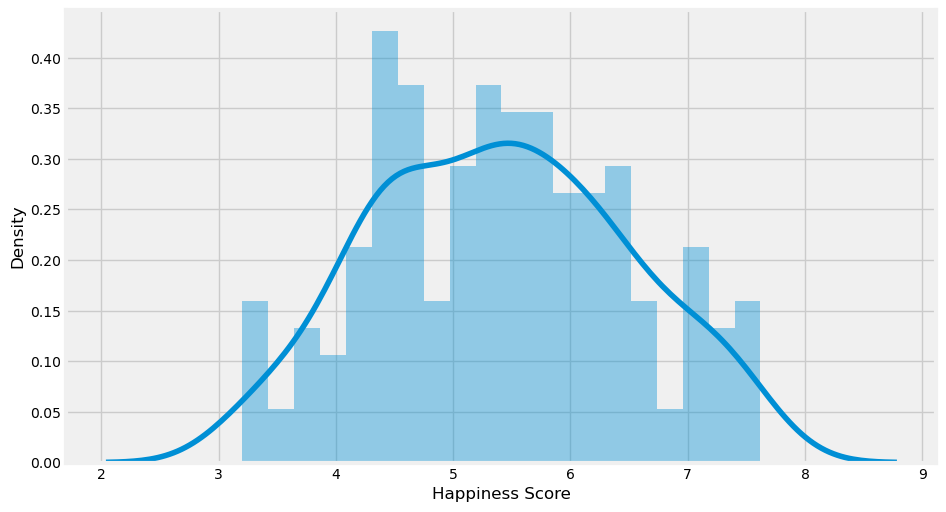

In [80]:
# Country averages
country_avg = combined_report.groupby("Country").mean()

# Plot results
fig, dist = plt.subplots(figsize = (10,6), dpi = 100)
sns.distplot(country_avg["Happiness Score"],bins=20)

Happiness score across the dataset has a mostly normal distribution. 

In [81]:
# Display results of highest and lowest countries by happiness
country_avg.loc[:,"Happiness Score"].sort_values(ascending=False)

Country
Finland                     7.619957
Denmark                     7.570800
Switzerland                 7.526843
Iceland                     7.516214
Norway                      7.512143
                              ...   
Syria                       3.292200
Burundi                     3.277900
South Sudan                 3.269320
Afghanistan                 3.236271
Central African Republic    3.202580
Name: Happiness Score, Length: 170, dtype: float64

The "happiest" countries include Finland, Denmark, and Switzerland, whereas the least "happiest" countires include South Sudan, Afghanistan, and the Central African Republic.

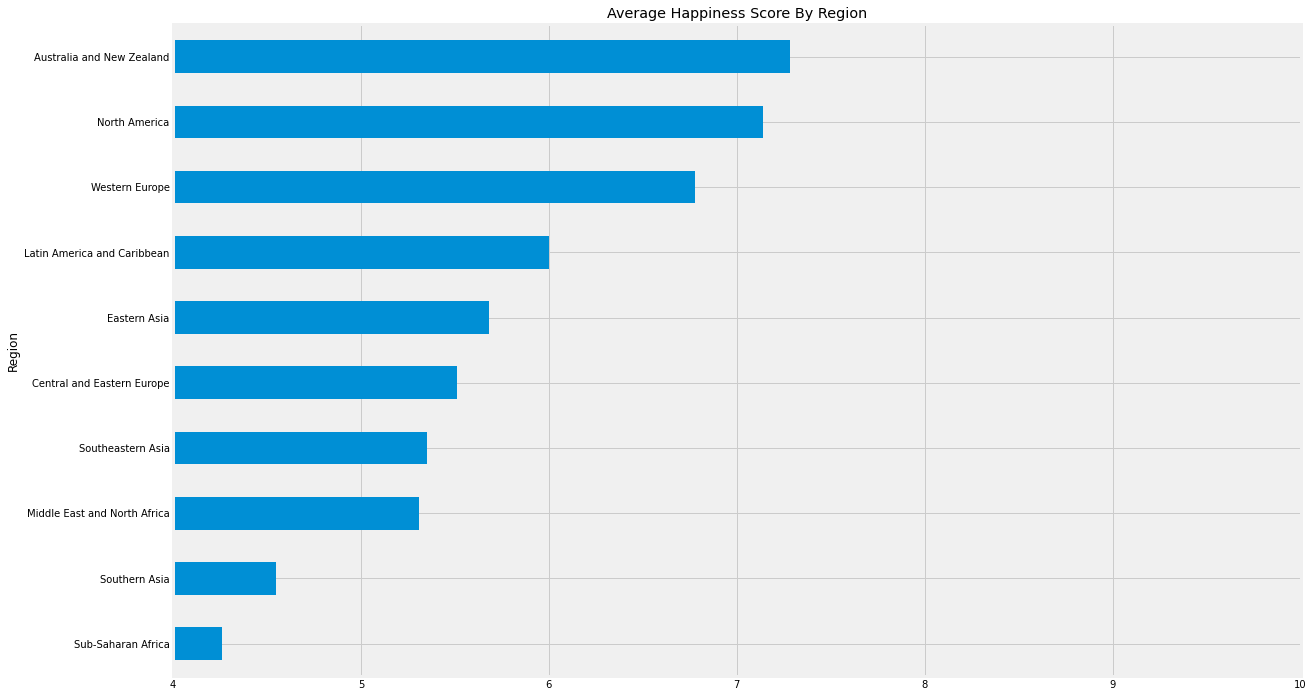

In [82]:
# Assign groupby object
combined_region = combined_report.groupby("Region")

# Caluclate Mean of Happiness Score
combined_region_mean = combined_region["Happiness Score"].mean().sort_values()

# Plot Results
combined_region_mean.plot(kind="barh",figsize=(18,12), title = "Average Happiness Score By Region", xlim=(4,10));

Regions with highest average Happiness:
* Australia and NZ
* North America
* Western Europe

Regions with lowest average Happiness:

* Middle East and North Africa
* Southern Asia
* Sub-Saharan Africa

Western Europe is the third "happiest" region, however compared to Aus/NZ and North America, it has the largest dispartiy between its lowest score and its highest score. We do have to note that compared to AUS/NZ and North America, Europe has a larger sample size. Therefore it's more likely that we would see greater distribution of scores compared to regions with much smaller sample sizes.

We can check for outliers by plotting just the region of Western Europe.

### Western Europe

In [83]:
# Retrieve countries located in Western Europe
europe = combined_region.get_group("Western Europe")

In [84]:
europe

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year,Impact - Economy,Impact - Family,Income Group
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,High,High,High income: OECD
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,High,High,High income: OECD
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,High,High,High income: OECD
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,High,High,High income: OECD
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015,High,High,High income: OECD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Italy,Western Europe,6.483,1.39300,0.94000,0.79800,0.37900,0.04700,0.13300,2.79400,2021,High,Low,High income: OECD
973,Cyprus,Western Europe,6.223,1.37700,0.76500,0.80100,0.46400,0.06100,0.17800,2.57800,2021,High,Low,High income: nonOECD
992,Portugal,Western Europe,5.929,1.32300,0.93900,0.76000,0.62100,0.03300,0.02900,2.22500,2021,High,Low,High income: OECD
1002,Greece,Western Europe,5.723,1.27300,0.81100,0.76000,0.24300,0.07400,0.00000,2.56100,2021,High,Low,High income: OECD


In [85]:
# Display value counts for following columns below
europe[["Impact - Economy","Impact - Family"]].apply(pd.Series.value_counts)

,Impact - Economy,Impact - Family
High,147,135
Low,1,13


By a small margin, the economic situation of residents of Western European Countries is higher than familial impact. Does this suggest that residents of high income countries typically value economic security more often? 

C:\Users\Crypt-Logic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

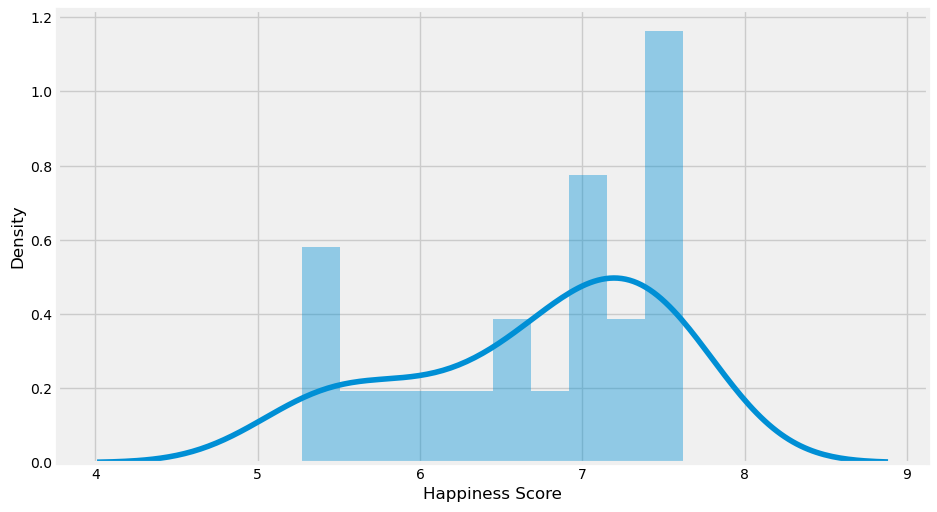

In [86]:
# Average happiness score of western european countries
euro_avg = europe.groupby("Country", as_index=False).mean() # Omit using country column as index

# Plot results
fig, dist = plt.subplots(figsize = (10,6), dpi = 100)
sns.distplot(euro_avg["Happiness Score"], bins = 10)

Western Europe follows a left-skewed distribution of happiness scores. 

In [87]:
# European countries with below average happiness scores
europe_low = euro_avg[euro_avg["Happiness Score"] < 6.77]

In [88]:
europe_low

,Country,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
2,Cyprus,5.863714,1.280634,1.008526,0.913600,0.401327,0.049026,0.236375,2.060838,2018.0
5,France,6.561400,1.344245,1.304439,0.916417,0.498858,0.196907,0.112613,2.217973,2018.0
7,Greece,5.285714,1.204068,1.037350,0.872864,0.120780,0.042768,0.000000,2.073836,2018.0
10,Italy,6.140343,1.312650,1.280094,0.923447,0.274198,0.032535,0.166589,2.213025,2018.0
12,Malta,6.577829,1.298859,1.347456,0.873478,0.606942,0.159904,0.431686,1.953714,2018.0
14,North Cyprus,5.700071,1.278312,1.075248,0.911107,0.470046,0.168534,0.222417,1.747456,2018.0
15,North Macedonia,5.274000,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,2.130000,2019.0
17,Portugal,5.480414,1.235994,1.226942,0.869568,0.534474,0.020656,0.076177,1.734287,2018.0
18,Spain,6.378414,1.299939,1.353633,0.946841,0.420389,0.083263,0.163480,2.174021,2018.0


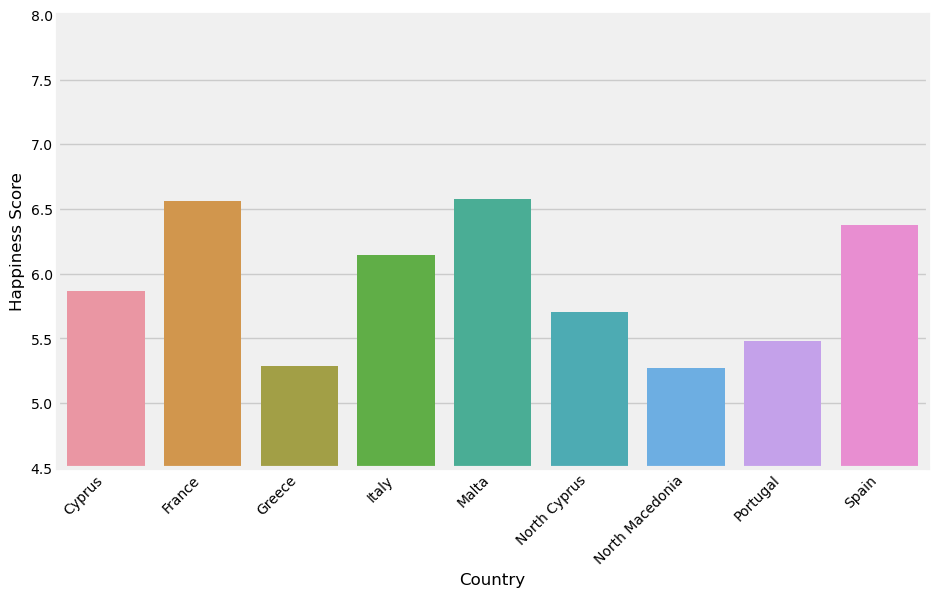

In [89]:
# Plot results
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
bar = sns.barplot(x = "Country", y ="Happiness Score", data = europe_low)

plt.xticks(rotation=45, ha="right")
bar.set_ylim(bottom=4.5, top=8);

Mediterranean countries have the lowest happiness score in Western Europe, but there is no other supporting data to suggest the factors that influence lower scores for these countries.

Latin America and the Caribbean is another region with a large dispartiy between the minimum and maximum happiness scores. Similar to how we visualized Western Europe we can do the same for this region.

### Latin America and Caribbean

In [90]:
# Get group of latin america and caribbean
latin_america = combined_region.get_group("Latin America and Caribbean")

In [91]:
latin_america

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year,Impact - Economy,Impact - Family,Income Group
11,Costa Rica,Latin America and Caribbean,7.226,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728,2015,Low,High,Upper middle income
13,Mexico,Latin America and Caribbean,7.187,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214,2015,High,Low,Upper middle income
15,Brazil,Latin America and Caribbean,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001,2015,Low,High,Upper middle income
22,Venezuela,Latin America and Caribbean,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131,2015,High,High,High income: nonOECD
24,Panama,Latin America and Caribbean,6.786,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848,2015,High,High,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,Bolivia,Latin America and Caribbean,5.716,0.84200,0.78200,0.48600,0.60000,0.06400,0.13800,2.80500,2021,Low,Low,Lower middle income
1005,Paraguay,Latin America and Caribbean,5.653,0.98300,0.97000,0.54900,0.60200,0.03700,0.20600,2.30600,2021,Low,Low,Upper middle income
1007,Dominican Republic,Latin America and Caribbean,5.545,1.10600,0.87900,0.55500,0.58100,0.14400,0.10100,2.17800,2021,High,Low,Upper middle income
1041,Venezuela,Latin America and Caribbean,4.892,0.85200,0.89700,0.57400,0.28400,0.07200,0.07800,2.13500,2021,Low,Low,High income: nonOECD


In [92]:
# Display results of economy and family impact columns using value_counts
latin_america[["Impact - Economy","Impact - Family"]].apply(pd.Series.value_counts)

,Impact - Economy,Impact - Family
High,64,106
Low,88,46


In Latin America, We can see Family has a higher contributing factor to happiness than economic factors.

C:\Users\Crypt-Logic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

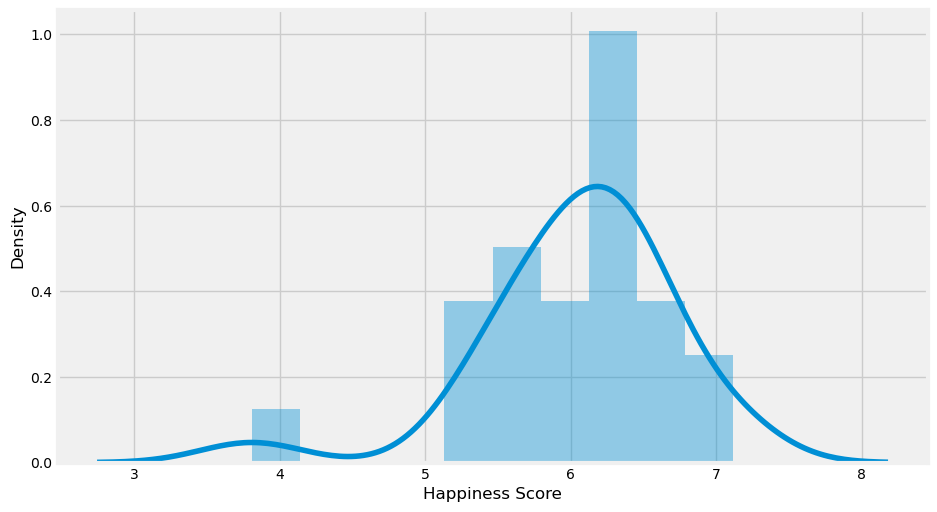

In [93]:
# Average happiness scores in latin america/caribbean
latin_america_avg = latin_america.groupby("Country", as_index=False).mean() # Omit using country column as index

# Plot results
fig, dist = plt.subplots(figsize = (10,6), dpi = 100)
sns.distplot(latin_america_avg["Happiness Score"], bins = 10)

Distribution plot shows slight left-skewness, with an obvious outlier with a score of ~ 4.

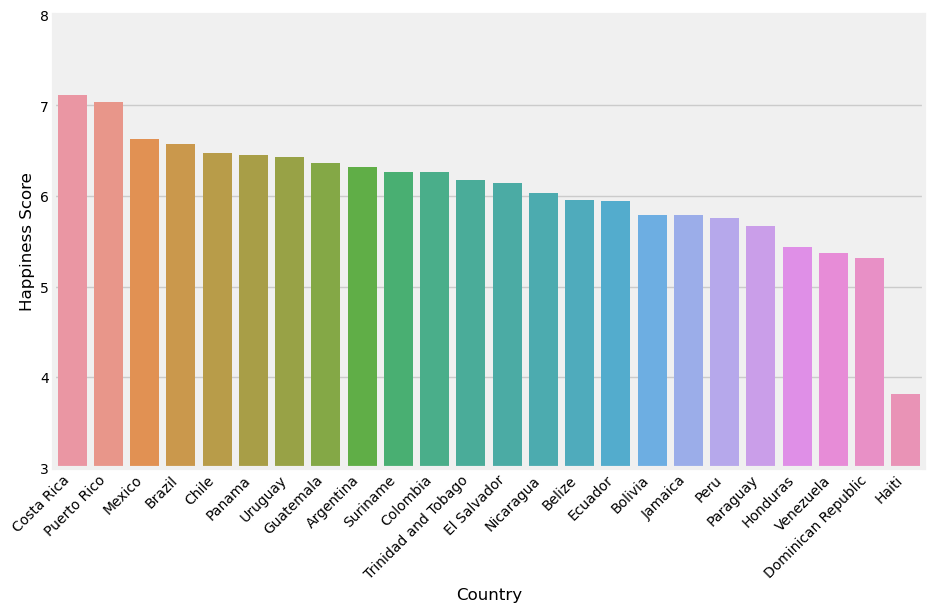

In [94]:
# Sort latin american countries by happiness score descending
latin_america_avg = latin_america_avg.sort_values(by="Happiness Score",ascending=False)

# Plot Latin America/Caribbean Happiness Scores
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
bar = sns.barplot(x = "Country", y ="Happiness Score", data = latin_america_avg)

bar.set_ylim(bottom=3, top=8)
plt.xticks(rotation=45, ha="right");

Lowest Happiness Score:
* Haiti (we may consider this an outlier due to its large disparity between other countries)
* Venezuela
* Bolivia

Puerto Rico (U.S. Territory) has one of the highest happiness scores along with Costa Rica.

In [95]:
latin_america["Income Group"].value_counts()

Upper middle income     75
Lower middle income     35
High income: nonOECD    28
High income: OECD        7
Low income               7
Name: Income Group, dtype: int64

In [96]:
# Filters for latin american countries only classified as high income
high_income_LA = (latin_america["Income Group"] == "High income: nonOECD") | (latin_america["Income Group"] == "High income: OECD")
latin_america[high_income_LA].groupby("Country").mean() # Constructs groupby object

,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
Country,,,,,,,,,
Argentina,6.314386,1.106520,1.286764,0.757179,0.496134,0.064136,0.085851,2.481914,2018.0
Chile,6.478214,1.166232,1.183379,0.827449,0.405655,0.082191,0.239260,2.480786,2018.0
Puerto Rico,7.039000,1.359430,1.081130,0.777580,0.468230,0.122750,0.222020,3.007600,2016.0
Trinidad and Tobago,6.179983,1.253425,1.320964,0.599454,0.529822,0.013809,0.253074,2.214451,2017.5
Uruguay,6.432443,1.130399,1.291948,0.774368,0.584880,0.194144,0.157886,2.313214,2018.0
Venezuela,5.371743,0.983511,1.265981,0.679961,0.232038,0.070407,0.064444,2.299328,2018.0


Earlier we noted that Venezuela was one of the lowest scored countries in Latin America, while Puerto Rico and Costa Rica ranked the highest. Costa Rica is not considered a high income nation, but it has the highest happiness score in Latin America. 

This may suggest that a low or high income does not neccessarily correlate to a high happiness score, and naturally there are many other factors in place that influence a population's satisfaction.

### Middle East and North Africa
We'll take a look at one more region in this analysis. Middle East has another large disparity between the minimum happiness score and the maximum.

In [97]:
# Get group for middle east
middle_east = combined_region.get_group("Middle East and North Africa")

In [98]:
middle_east["Country"].nunique()

20

C:\Users\Crypt-Logic\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

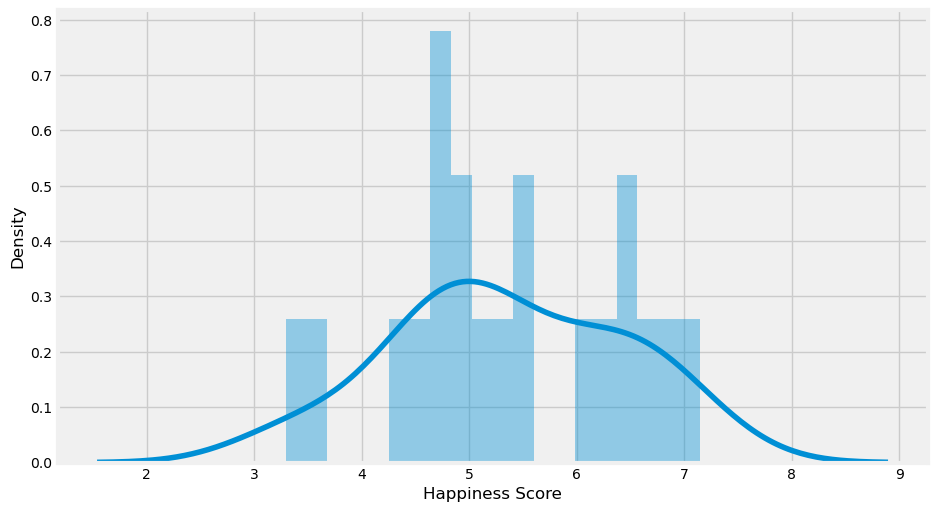

In [99]:
# Counstruct groupby object of middle east countries
middle_east_avg = middle_east.groupby("Country", as_index=False).mean()

# Plot results
fig, dist = plt.subplots(figsize = (10,6), dpi = 100)
sns.distplot(middle_east_avg["Happiness Score"], bins = 20) # bins set to 20 for each country

* Highest density of happiness score is around 4.7 to 5.0
* Middle east distribution is fairly normal.

In [100]:
middle_east[["Impact - Economy","Impact - Family"]].apply(pd.Series.value_counts)

,Impact - Economy,Impact - Family
High,73,63
Low,57,67


Economic factors typically contribute more to happiness slightly more than family in middle eastern countries. We saw in Latin America that family has a significantly higher contribution to happiness.


In [101]:
middle_east["Income Group"].value_counts()

Upper middle income     56
High income: nonOECD    34
Lower middle income     21
High income: OECD        7
Name: Income Group, dtype: int64

In [102]:
# Middle east income
# Filter high income countries
highincome_me = (middle_east["Income Group"] == "High income: nonOECD") | (middle_east["Income Group"] == "High income: OECD")

# Filter upper and lower income countries
lowerincome_me = (middle_east["Income Group"] == "Lower middle income") | (middle_east["Income Group"] == "Upper middle income")

# Filter and display only high income countries
middle_east[highincome_me].groupby("Country").mean()

,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
Country,,,,,,,,,
Bahrain,6.206186,1.379729,1.204521,0.732441,0.552402,0.188494,0.221316,2.044441,2018.0
Israel,7.142371,1.301582,1.298121,0.901357,0.431028,0.117610,0.296363,2.750992,2018.0
Kuwait,6.135871,1.523449,1.146428,0.690312,0.527321,0.164822,0.158853,2.037969,2018.0
Oman,6.853000,1.360110,1.081820,0.762760,0.632740,0.325240,0.215420,2.474890,2015.0
Qatar,6.421800,1.743691,1.169707,0.768732,0.604064,0.355974,0.291217,1.708889,2017.0
Saudi Arabia,6.397214,1.423842,1.168693,0.665984,0.462678,0.212011,0.113527,2.321441,2018.0
United Arab Emirates,6.724686,1.601746,1.065782,0.734685,0.573857,0.331878,0.265113,2.149453,2018.0


In [103]:
# Filter and display only lower income countries
middle_east[lowerincome_me].groupby("Country").mean()

,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
Country,,,,,,,,,
Algeria,5.461443,0.993524,1.039862,0.660386,0.156447,0.139955,0.087002,2.393078,2018.0
Egypt,4.330057,0.921812,0.848020,0.554054,0.288021,0.091859,0.096343,1.762457,2018.0
Iran,4.691343,1.071654,0.671552,0.680822,0.302184,0.100535,0.330352,1.794468,2018.0
Iraq,4.611543,1.015423,0.855717,0.519237,0.238243,0.097089,0.168107,1.932857,2018.0
Jordan,4.989486,0.889129,1.067184,0.675532,0.416588,0.137369,0.119402,1.849688,2018.0
Lebanon,5.014786,1.015649,1.004995,0.759990,0.281353,0.046352,0.199778,1.838657,2018.0
Libya,5.554829,1.056435,1.156747,0.574805,0.446641,0.136070,0.146950,2.114139,2018.0
Morocco,5.124829,0.797730,0.606425,0.650865,0.412369,0.081807,0.040070,2.463747,2018.0
Tunisia,4.661457,0.925768,0.742494,0.689010,0.256536,0.062558,0.052178,2.089363,2018.0


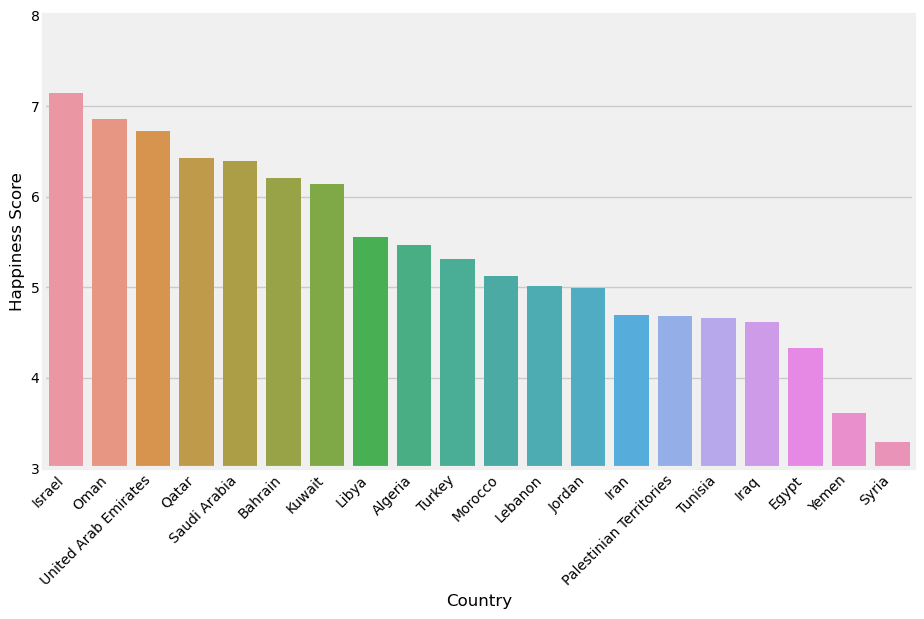

In [104]:
# Sort middle east scores descending
middle_east_avg = middle_east_avg.sort_values(by="Happiness Score",ascending=False)

# Plot Results
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
bar = sns.barplot(x = "Country", y ="Happiness Score", data = middle_east_avg)

bar.set_ylim(bottom=3, top=8)
plt.xticks(rotation=45, ha="right");

Israel, Oman and United Arab Emirates (UAE) have top three highest happiness scores with countries Egypt, Yemen and Syria having the lowest scores.

In the middle east and north africa we notice that generally, high income nations possess a higher average happiness score whereas upper-middle and lower-middle income nations have a lower happiness score. 

Conflicts in Yemen and Syria could potentially affect the attitudes and opinions of respondents that were surveyed from these countries.


### World Happiness

In [105]:
# Construct groupby object of year
year_avg = combined_report.groupby("Year", as_index=False).mean()
year_avg

,Year,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual
0,2015,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
1,2016,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
2,2017,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883,1.850238
3,2018,5.375917,0.891449,1.213237,0.597346,0.454506,0.115333,0.181006,2.130000
4,2019,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846,2.130000
5,2020,5.473240,0.868771,1.155607,0.692869,0.463583,0.130718,0.189375,1.972317
6,2021,5.532839,0.977161,0.793315,0.520161,0.498711,0.135141,0.178047,2.430329


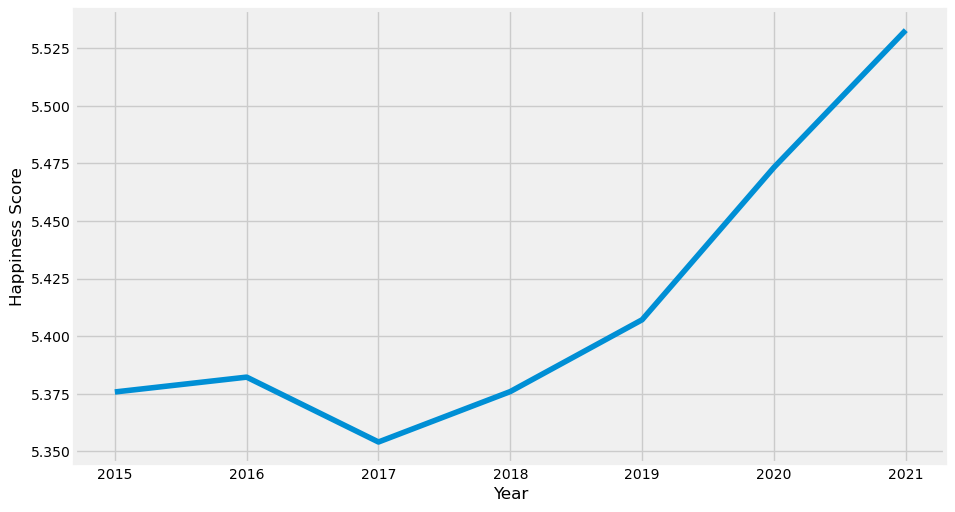

In [106]:
fig, line = plt.subplots(figsize = (10,6), dpi = 100)
line = sns.lineplot(x = "Year", y ="Happiness Score", data = year_avg)
#line.set_ylim(bottom=5, top=5.7)

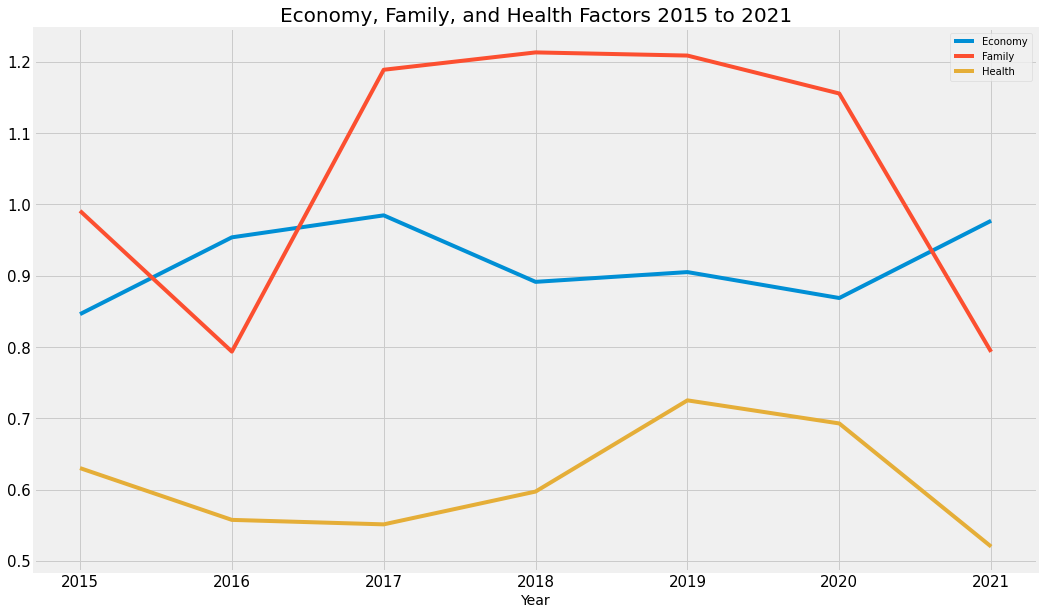

In [127]:
# Plot changes of economy, family and health factors over time
plt.figure(figsize=(16,10))

plt.plot(year_avg["Year"], year_avg["Economy"], label= "Economy")
plt.plot(year_avg["Year"], year_avg["Family"], label= "Family")
plt.plot(year_avg["Year"], year_avg["Health"], label= "Health")

plt.title("Economy, Family, and Health Factors 2015 to 2021",size= 20)
plt.xticks(size=15)
plt.xlabel("Year",size=14)
plt.yticks(size=15)
plt.legend()

plt.show()

For the last 5 to 6 years family contributed the most to happiness score, and economy and health had less significant contributions.
In 2020, we can see that family and health took an abrupt decrease in its influence of happiness; meanwhile, economy has begins to increase as a factor to happiness in the same year and into 2021.

In [108]:
# Construct groupby object of income groups
income_cat = combined_report.groupby("Income Group").mean()
income_cat

,Happiness Score,Economy,Family,Health,Freedom,Trust Government Corruption,Generosity,Dystopia Residual,Year
Income Group,,,,,,,,,
High income: OECD,6.763148,1.351903,1.318625,0.871318,0.526038,0.216802,0.234646,2.250338,2018.000000
High income: nonOECD,6.143204,1.313267,1.210676,0.751454,0.466132,0.153067,0.179561,2.148231,2017.882883
Low income,4.013377,0.289703,0.680758,0.290964,0.351048,0.116245,0.239827,2.106852,2018.000000
Lower middle income,4.961717,0.697741,0.958939,0.503768,0.424703,0.098350,0.223507,2.127570,2017.960870
Upper middle income,5.424922,1.019873,1.109954,0.647007,0.412595,0.083197,0.161126,2.083895,2017.963504


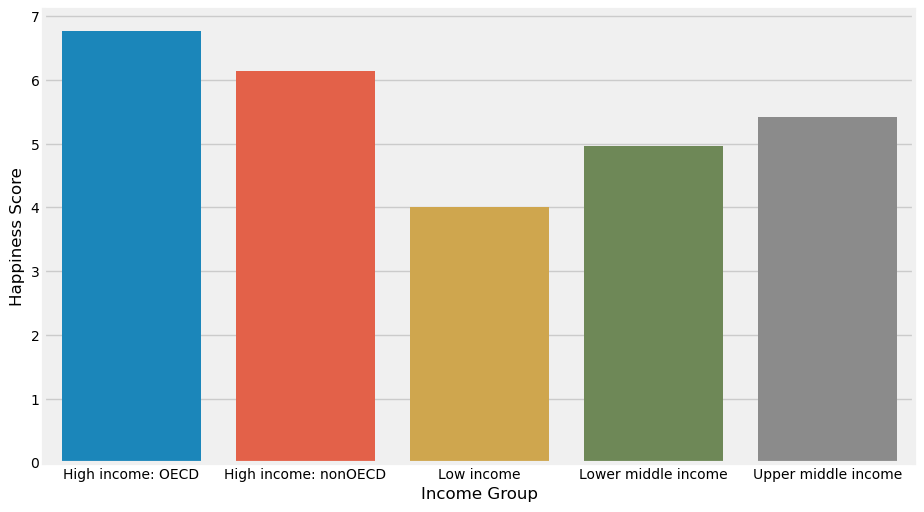

In [109]:
# Plot results of income group classifications based on average happiness score
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
bar = sns.barplot(x = income_cat.index, y ="Happiness Score", data = income_cat)

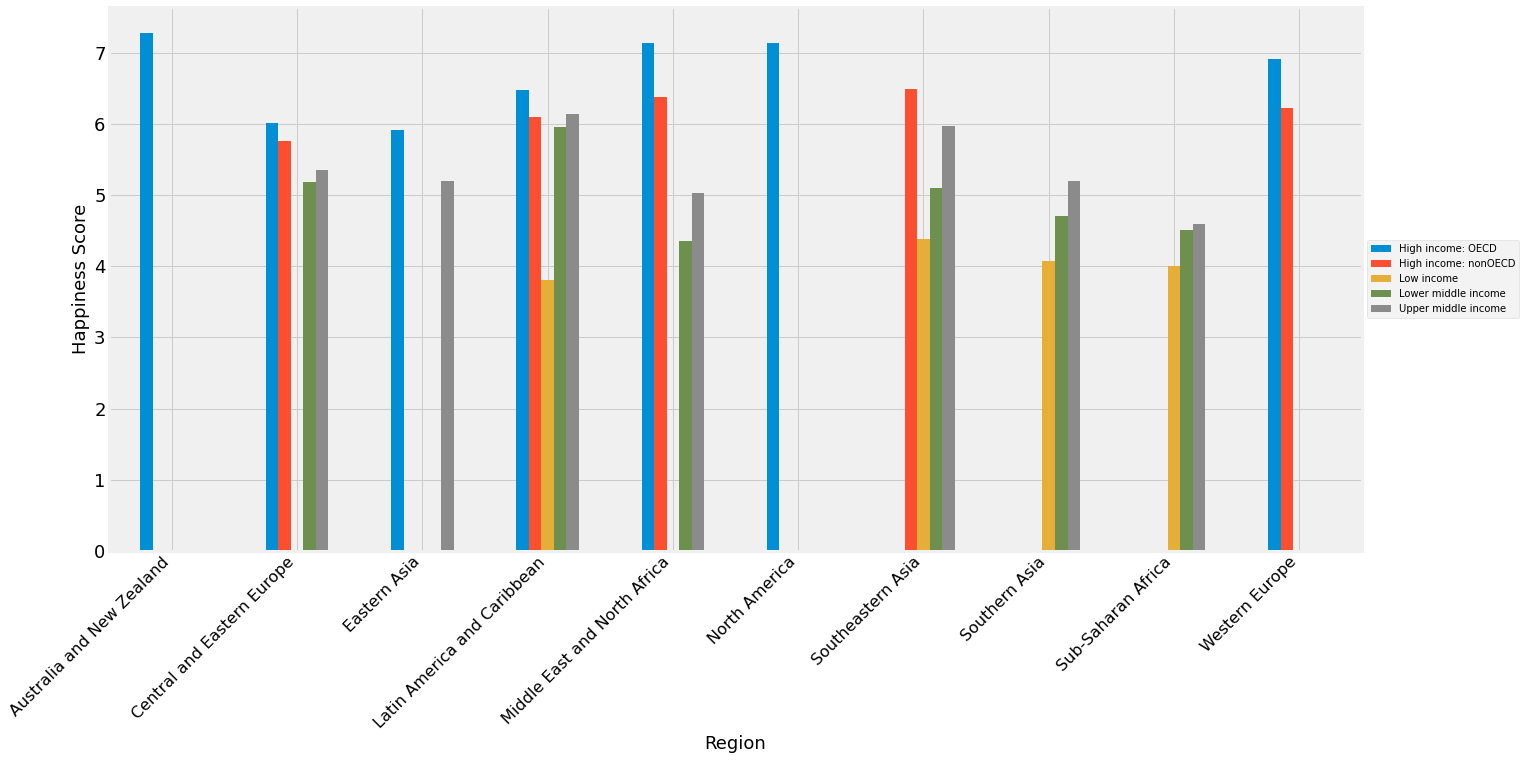

In [110]:
# Construct pivot table aggregated by happiness score grouped by region and income group
pivot_table = combined_report.pivot_table("Happiness Score","Region","Income Group")
pivot_table.plot(kind="bar", figsize=(20,10),rot=45)

# Plot results
plt.legend(loc="center left",bbox_to_anchor=(1.0, 0.5))
plt.xticks(size=16,ha="right")
plt.xlabel("Region",size=18)
plt.yticks(size=18)
plt.ylabel("Happiness Score",size=18);


High income countries typically enjoy an above average level of happiness, while lower to upper middle income nations have a happiness score closer to the world's overall happiness of 5.41.
According to the information found within this dataset, low income nations hold the least amount of "happiness".

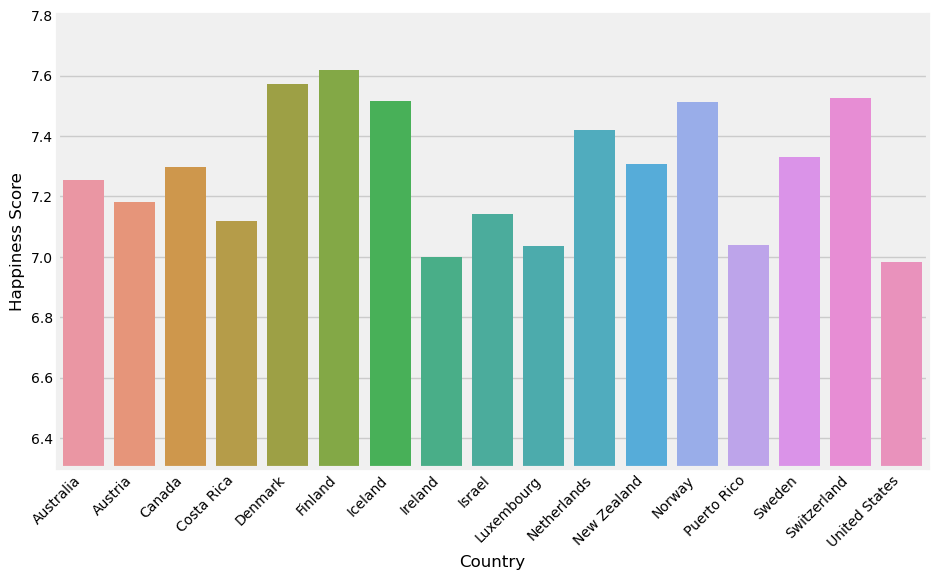

In [138]:
# Countries with higher or equal average happiness than United States
usa = country_avg.loc["United States","Happiness Score"]
greater_usa = country_avg[country_avg["Happiness Score"] >= usa]
greater_usa

fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
bar = sns.barplot(x = greater_usa.index, y ="Happiness Score", data = greater_usa)
plt.xticks(rotation=45, ha="right")
bar.set_ylim(bottom=6.3, top=7.8);


Typically Western European countries or Australia and New Zealand have a happiness score higher than the US.

## Conclusion

Utilizing the data from the world happiness report 2015 to 2021 we discovered that world happiness has improved slightly since 2015. 

The two factors that contribute the most to the happiness score are family and economy (in order). Over the years family had the highest impact, but in 2020 it decreased dramatically following the same trend into 2021. The health factor, while being lower than both economy and family took a sudden decrease in 2020 to 2021. 

However, the impact economy had on world happiness suddenly increased at the same time family and health decreased in 2020-2021.

We imported another dataset containing income classifications for every country. We were able to map the classifications to their respective countries. Generally, high income nations have the highest average happiness score, followed by upper-middle income and lower income nations with an average happiness score closer to the average world happiness score. Low income nations typically have the lowest happiness score.

The "happiest" countries include Finland, Denmark, and Switzerland, whereas the least "happiest" countires include South Sudan, Afghanistan, and the Central African Republic.